In [8]:
import argparse
import numpy as np
import pymc as pm
from pytensor import tensor as pt
from pytensor.gradient import verify_grad
import arviz as az
import matplotlib.pyplot as plt
from umbridge.pymc import UmbridgeOp

Sequential sampling (10 chains in 1 job)
Metropolis: [posterior]


Sampling 10 chains for 1_000 tune and 9_000 draw iterations (10_000 + 90_000 draws total) took 1667 seconds.


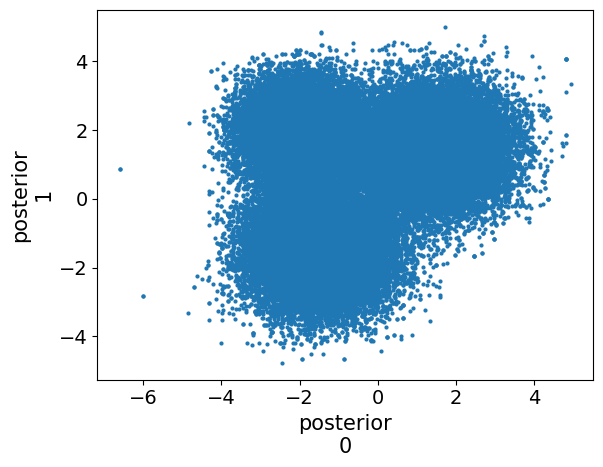

               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
posterior[0] -0.657  1.744  -3.139    2.636      0.018    0.012   11182.0   
posterior[1]  0.631  1.758  -2.605    3.172      0.018    0.013   10979.0   

              ess_tail  r_hat  
posterior[0]   20370.0    1.0  
posterior[1]   20563.0    1.0  


In [20]:
if __name__ == "__main__":

    # Set up an pytensor op connecting to UM-Bridge model
    op = UmbridgeOp('http://0.0.0.0:4243', "posterior")
    

    # Define input parameter
    input_dim = 2

    with pm.Model() as model:
        # UM-Bridge models with a single 1D output implementing a PDF
        # may be used as a PyMC density that in turn may be sampled
        posterior = pm.DensityDist("posterior",logp=op,shape=input_dim)
        inferencedata = pm.sample(tune=1000,step=pm.Metropolis(),draws=9000,cores=1, chains=10)
        az.plot_pair(inferencedata);
        plt.show()
        
        summary = az.summary(inferencedata)
        print(summary)

